<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Neural Network Model

Die Funktionsweise von neuronalen Netzwerken ist angelehnt an biologische Abläufe im Gehirn. Mehrere Neuronen sind untereinander verbunden und erzeugen abhängig vom Input ein Signal, das sie an die nachstehenden Neuronen weitergeben. 

Innerhalb von neuronalen Netzen stellt das Perceptron eine wiederkehrende Struktur dar. Es hat ein oder mehrere Inputs und einen Bias, welche jeweils mit einem Weight-Faktor multipliziert und anschließend aufsummiert werden. Das Ergebnis wird in eine Activation Function gespeißt, welche einen einzelnen Output-Wert berechnet.

<img src='images/perceptron.png' width="400px" align="center" />

In einem neuralen Netz werden mehre Perceptrons miteinander verknüpft. Der Input Layer nimmt den Datensatz mit den Features entgegen und der Output Layer erzeugt das Ergebnis, in diesem Fall die Klassifizierung "left - yes or no". Die Layer dazwischen werden als Hidden Layer bezeichnet. Größer die Anzahl der Hidden Layer und je größer die Anzahl der Perceptrons pro Layer, desto höher wird der Grad der Komplexität, der mit dem neuronalen Netz abgebildet werden kann.

<img src='images/neural_network.png' width="300px" align="center" />

Da bei den bisher getesteten Modellen Logistic Regression und Support Vector Machine ein "High Bias" und somit "Underfitting" vorliegen, wird nun der Algorithmus des Neuronalen Netzes auf die Daten angewandt. Die vorigen Algorithmen waren nicht in der Lage die komplexen Zusammenhänge des Datensets ausreichend abzubilden, sodass die Fehlerquote selbst auf den Trainingsdaten hoch ist. Bei den neuronalen Netzen besteht die Hoffnung, dass sie bei einer hohen Anzahl an Neuronen und Layern weitere Details erlernen können und sich somit der Bias reduzieren lässt.

### Initializations

In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Neural Network

In [5]:
# Neural Network initialisieren
mlp = MLPClassifier(hidden_layer_sizes=(44,44,22,22,11), max_iter=10000, random_state=42)

In [6]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
# Score berechnen
mlp.score(X_test_scaled, y_test)

0.95199999999999996

In [8]:
# Confusion Matrix und Classification Report erstellen
predictions = mlp.predict(X_test_scaled)

In [9]:
print(confusion_matrix(y_test, predictions))

[[1502   34]
 [  62  402]]


In [10]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1536
          1       0.92      0.87      0.89       464

avg / total       0.95      0.95      0.95      2000



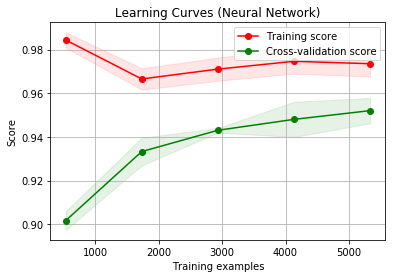

In [11]:
# Learning Curve berechnen
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Für einen ersten Test wurde eine Netzwerkarchitektur mit fünf Layern gewählt, wobei die Anzahl der Neuronen pro Layer jeweils abnimmt. Mit einem Score von 95,20% wurde bereits ein gutes Ergebnis erreicht. Die Learning Curve zeigt allerdings, dass immer noch ein Bias besteht.

### Use Neural Network w/o Department

Wie bei den vorherigen Modellen wird als nächstes das Attribut Department aus der Betrachtung heraus gelassen. Damit umfasst das Trainingsset zehn Spalten weniger, sodass bei gleicher Anzahl an Neuronen ein besseres Fitting erwartet wird. 

In [12]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [13]:
# Neuronal Network initialisieren
mlp = MLPClassifier(hidden_layer_sizes=(44,44,22,22,11), max_iter=10000, random_state=42)

In [14]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
# Score berechnen
mlp.score(X_test_scaled, y_test)

0.96199999999999997

In [16]:
# Confusion Matrix erstellen
predictions = mlp.predict(X_test_scaled)

In [17]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1512   24]
 [  52  412]]


In [18]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1531,    5],
       [  25,  439]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [19]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'neural_net':{'cm': cm, 'label': 'Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1512,   24],
       [  52,  412]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1531,    5],
       [  25,  439]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [20]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1536
          1       0.94      0.89      0.92       464

avg / total       0.96      0.96      0.96      2000



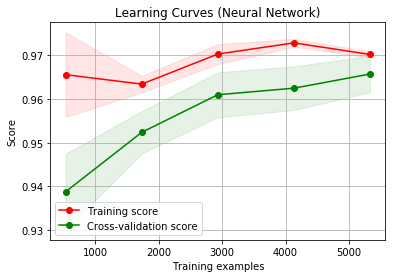

In [21]:
# Learning Curve berechnen
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Durch das Herauslassen der zehn Spalten konnte letztendlich der Score auf 96,20% verbessert, der Bias allerdings kaum reduziert werden.

### Hyperparameter Tuning Using Randomized Search

Für Modelle mit neuronalen Netzen stehen in der sklearn-Bibliothek zahlreiche Hyperparameter zu Verfügung. Um ein ausgewogenes Verhältnis von Bias und Variance und damit einen besseren Score zu erreichen, müssen daher einige Kombinationen an Hyperparametern ausprobiert werden. Dazu zählt die Architektur der Hidden Layer, die Art der Activation Function, der Solver, die Learning Rate sowie der Alpha Wert. Aufgrund der hohen Zahl an Kombinationsmöglichkeiten konnte kein GridSearchCV verwendet werden. Stattdessen wird auf RandomizedSearchCV zurückgegriffen, womit eine feste Anzahl an Versuchen vorgegeben werden kann. Außerdem wird bei Parametern mit Zahlenwerten ein Bereich angegeben, anstatt einzelne Ausprägungen, sodass eine automatische Auswahl an Werten stattfinden kann. 

In [5]:
# Importieren weiterer Bibliotheken
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [7]:
# Neuronal Network initialisieren
mlp = MLPClassifier(max_iter=10000, random_state=42)

In [8]:
# zu testende Parameter vorgeben
param_space = {'hidden_layer_sizes': [(100,), (100,100,), (100,100,100,)],'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'],'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': stats.uniform(0.001, 0.05), 'alpha':stats.uniform(0.0001, 0.005)}

In [9]:
# Grid Search Crossvalidation definieren 
rs = RandomizedSearchCV(mlp, param_space, n_iter=50, cv=3, n_jobs=8)

In [10]:
# Modelle erstellen
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=8,
          param_distributions={'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116b89f28>, 'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116b89e10>},
          pre_dispatch='2*n_jo

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


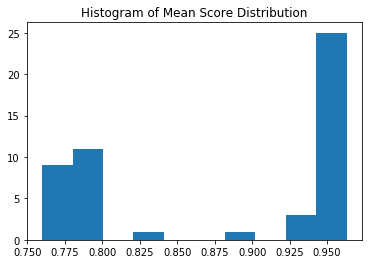

In [11]:
# Histogramm erstellen
scores = pd.DataFrame(rs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [12]:
# besten Modellscore ausgeben
rs.best_score_

0.96299999999999997

In [13]:
# beste Parameterkombination ausgeben
rs.best_params_

{'activation': 'tanh',
 'alpha': 0.00049647851517506218,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.049004017565006004,
 'solver': 'lbfgs'}

In [15]:
# Neural Network mit bester Parameterkombination initialisieren
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate='constant', learning_rate_init=0.049004017565006004, max_iter=10000, random_state=42, activation='tanh', alpha=0.00049647851517506218, solver='lbfgs')

In [16]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=0.0004964785151750622,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(100, 100, 100),
       learning_rate='constant', learning_rate_init=0.049004017565006004,
       max_iter=10000, momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
# Score ausgeben
mlp.score(X_test_scaled, y_test)

0.96450000000000002

In [18]:
# Confusion Matrix erstellen
predictions = mlp.predict(X_test_scaled)

In [19]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1494   42]
 [  29  435]]


In [20]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [21]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'neural_net':{'cm': cm, 'label': 'Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [22]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1536
          1       0.91      0.94      0.92       464

avg / total       0.96      0.96      0.96      2000



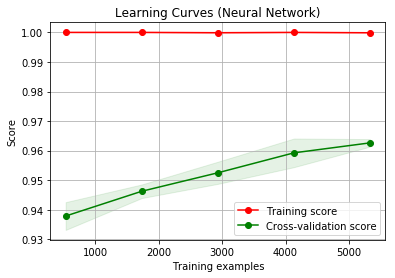

In [23]:
# Learning Curve berechnen
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Durch die RandomizedSearchCV konnten Hyperparameter ermittelt werden, die den Score nochmals auf 97,50% erhöhen. Auch die Learning Curve sieht ausgewogen aus und es liegt kein Underfitting mehr vor. Es ist anzunehmen, dass für eine weitere Verbesserung des Modells eine größere Menge an Testdaten erforderlich wäre. Auch könnte die Anzahl an Tests im RandomizedSearchCV erhöht werden, um eine noch bessere Auswahl der Hyperparameter zu erzielen. Allerdings ist dies mit einem enormen Rechenaufwand verbunden. Aus diesem Grund wurde auch auf die Feature Selection verzichtet, da es viel Zeit in Anspruch nehmen würde, die Kombinationsmöglichkeiten zum Herausnhemen von Features durchzurechnen. 